In [1]:
# Import libraries

import os, sys, warnings
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from IPython.display import Markdown as md

#sys.path.append('../Environment/')
#from Environment.environment import *
%run ../Environment/environment.ipynb

TypeError: 'module' object is not callable

In [17]:
def print_matrix(name, matrix):
    matrix = np.atleast_2d(matrix)
    s = ''
    for idx, v in enumerate(matrix.flatten()):
        s = s + ' {:0.3f} '.format(v)
        if idx != (matrix.size-1):
            if idx % matrix.shape[0] == matrix.shape[0]-1:
                s = s + '\\\\'
            else:
                s = s + '&'
    return md(name + ' = $' + '\\begin{bmatrix}' + s + '\\end{bmatrix}$')

In [3]:
# # Initialize some variables

# # Restart the environment
# env = EnvironmentState()

# NUM_ACTIONS = 5
# ACTIONS = np.asarray([0, 1, 2, 3, 4])

# NUM_POSITIONS = (env.REGION_HEIGHT/0.05)+1
# NUM_ANGLES    = ((258-102)/3)+1                               # Evironment states include a 
#                                                               # range of angles (102 to 258)
# POS_STATES = np.zeros((int(NUM_POSITIONS), int(NUM_ANGLES)))  # for every y position the agent
# ANG_STATES = np.zeros((int(NUM_POSITIONS), int(NUM_ANGLES)))  # can occupy 

# # Fill the state values
# for i in range(int(NUM_ANGLES)):
#     POS_STATES[:,i] = np.arange(-1*env.REGION_HEIGHT/2, env.REGION_HEIGHT/2+0.05, 0.05)
    
# for i in range(int(NUM_POSITIONS)):
#     ANG_STATES[i,:] = np.arange(102, 258+3, 3)

# # Initialize the Q values
# Q = np.zeros((int(NUM_POSITIONS), int(NUM_ANGLES), int(NUM_ACTIONS)))

# # Resize the states and Q values for easier searching, intersections, and copmarisons
# POS_STATES = np.round(POS_STATES.reshape(int(NUM_POSITIONS*NUM_ANGLES), order = 'F'), 2)
# ANG_STATES = ANG_STATES.reshape(int(NUM_POSITIONS*NUM_ANGLES), order = 'F')
# Q = Q.reshape(int(NUM_POSITIONS*NUM_ANGLES), NUM_ACTIONS, order = 'F')

# # Now Q is a state x action matrix
# # Column 1 is wait action, 2 is pos up, 3 is pos down, 4 is aim up, 5 is aim down
# # Each row corresponds to a (pos & angle) state

In [4]:
# # Initialize some variables

# # Restart the environment
# env = EnvironmentState()

# NUM_ACTIONS = 5 # Define the actions
# ACTIONS = np.asarray([0, 1, 2, 3, 4])

# # Define the state space, defined to be the possible y positions of te agent.
# NUM_STATES = (env.REGION_HEIGHT/0.05)+1
# STATES = np.round(np.arange(-1*env.REGION_HEIGHT/2, env.REGION_HEIGHT/2+0.05, 0.05),2)

# # Initialize the Q values
# Q = np.zeros((int(NUM_STATES), int(NUM_ACTIONS)))

# # Q is a state x action matrix
# # Column 1 is wait action, 2 is pos up, 3 is pos down, 4 is aim up, 5 is aim down
# # Each row corresponds to a pos state

In [5]:
# # Initialize parameters
# NUM_OBS = 0 # Number of obstacles
# NUM_STEPS = 100 # Number of steps in an episode
# NUM_EPISODES = 1000

# alpha = 0.02
# eps   = 0.01
# gamma = 0.90
# #episode = 0
# hits = np.zeros((NUM_EPISODES))
# R_SUM = np.zeros((NUM_EPISODES))
# MSE   = np.zeros((NUM_EPISODES))

# # Use a Q-Learning algorithm based on the algorithm on page 131 of Sutton and Barto.
# for episode in range(NUM_EPISODES):
#     env.initialize() # Try different levels of complexity for agent and target position
#     env.randomize_obstruction(NUM_OBS)
#     #env.randomize_agent()
#     #env.randomize_target()
#     #env.randomize(NUM_OBS)
#     R_vector = np.zeros((NUM_STEPS))
#     n = 0
#     while True:
#         # Find the current state
#         #s = np.where( (POS_STATES == np.round(env._agent_position_y,2)) & (ANG_STATES == env._agent_aiming_angle) )[0]
#         s = np.where(STATES == np.round(env._agent_position_y,2))[0]
        
#         # Create a policy based on epsilon greedy
#         if len(np.unique(Q[s,:])) <= 1: # If all Q values are same, set policy to equal for all actions
#             pi = np.zeros((NUM_ACTIONS))
#             pi[:] = 1/NUM_ACTIONS
#         elif len(np.unique(Q[s,:])) <= 4: # If multiple Q have a max, assign priority to the first max Q value
#             pi = np.asarray([((1 - eps) + eps/NUM_ACTIONS if Q[s,i]==np.max(Q[s,:]) else eps/NUM_ACTIONS) for i in range(NUM_ACTIONS)])
#             ind = np.where(pi == np.max(pi))[0]
#             pi[ind[1:]] = eps/NUM_ACTIONS
#         else:
#             pi = np.asarray([((1 - eps) + eps/NUM_ACTIONS if Q[s,i]==np.max(Q[s,:]) else eps/NUM_ACTIONS) for i in range(NUM_ACTIONS)])
        
#         # Choose and take an action based on policy
#         action = np.random.choice(ACTIONS, replace = True, p = pi)
#         env.take_action(action)
        
#         # With the action taken, the agent is now in the future state s'. Find that state
#         #s_prime = np.where( (POS_STATES == np.round(env._agent_position_y,2)) & (ANG_STATES == env._agent_aiming_angle) )[0]
#         s_prime = np.where(STATES == np.round(env._agent_position_y,2))[0]
        
#         # Collect the reward
#         R = env.compute_reward()
#         R_vector[n] = R
        
#         # Update the Q value
#         if len(np.unique(Q[s_prime,:])) <= 1: # If all Q values are the same, use any one
#             Q[s,action] = Q[s,action] + alpha*(R + gamma*Q[s_prime,0] - Q[s,action])
#         else:
#             Q[s,action] = Q[s,action] + alpha*(R + gamma*np.max(Q[s_prime,:]) - Q[s,action])
        
#         n = n + 1
        
#         # At the end of the episode, determine if the algorithm hit the target and break
#         # the loop to move on to the next episode
#         if n == NUM_STEPS:
#             hits[episode] = 1 if R == 1 else 0 # If agent is aiming at the target, R is 1. 
#             R_SUM[episode] = np.sum(R_vector)
#             MSE[episode]  = np.var(R_vector) # For the unbiased case, the RSE is the variance
#             break

# # print(hits)
# print(np.sum(hits)/len(hits))

# Initialize Environment / Model Variables

In [28]:
# Restart the environment
env = EnvironmentState()

NUM_ACTIONS = 5 # Define the actions
ACTIONS = np.asarray([0, 1, 2, 3, 4])

# Define the state space, defined to be the possible y positions of te agent.
NUM_POS_STATES = (env.REGION_HEIGHT/0.05)+1
NUM_ANG_STATES = (160/3)+1
POS_STATES = np.round(np.arange(-1*env.REGION_HEIGHT/2, env.REGION_HEIGHT/2+0.05, 0.05),2)
ANG_STATES = np.round(np.arange(100, 260, 3),2)-1

# Initialize state-value function
V = np.zeros((int(NUM_POS_STATES),int(NUM_ANG_STATES)))

# initialize policy
pi = np.zeros((NUM_ACTIONS))
pi[:] = 1/NUM_ACTIONS

# Run TD Learning Algorithm

In [60]:
# Initialize parameters
NUM_OBS = 0 # Number of obstacles
NUM_STEPS = 100 # Number of steps in an episode
NUM_EPISODES = 100

alpha = 0.5
eps   = 0.01
gamma = 0.90
#episode = 0
hits  = np.zeros((NUM_EPISODES))
R_SUM = np.zeros((NUM_EPISODES))
MSE   = np.zeros((NUM_EPISODES))

def iterate():
    # Use a Q-Learning algorithm based on the algorithm on page 131 of Sutton and Barto.
    for episode in range(NUM_EPISODES):
        env.initialize() # Try different levels of complexity for agent and target position
        env.randomize_obstruction(NUM_OBS)

        #env.randomize_agent()
        #env.randomize_target()
        #env.randomize(NUM_OBS)

        R_vector = np.zeros((NUM_STEPS))
        n = 0
        while True:
            # Get current state index
            s_p = np.where(POS_STATES == np.round(env._agent_position_y,2))[0]
            s_a = np.where(ANG_STATES == np.round(env._agent_aiming_angle,2))[0]

            # Choose and take an action based on policy
            action = np.random.choice(ACTIONS, replace = True, p = pi)
            env.take_action(action)

            # With the action taken, the agent is now in the future state s'. Find this state's index
            sp_p = np.where(POS_STATES == np.round(env._agent_position_y,2))[0]
            sp_a = np.where(ANG_STATES == np.round(env._agent_aiming_angle,2))[0]
            
            # Collect reward value for this state
            R = env.compute_reward()
            R_vector[n] = R
            # Update the value function
            V[s_p, s_a] = V[s_p, s_a] + alpha * (R + gamma * V[sp_p, sp_a] - V[s_p, s_a])

            n = n + 1

            # At the end of the episode, determine if the algorithm hit the target and break
            # the loop to move on to the next episode
            if n == NUM_STEPS:
                hits[episode] = 1 if R == 1 else 0 # If agent is aiming at the target, R is 1. 
                R_SUM[episode] = np.sum(R_vector)
                MSE[episode]  = np.var(R_vector) # For the unbiased case, the RSE is the variance
                break
            yield
        yield
    return

# print(hits)

In [61]:
draw = False
if draw:
    plt.figure(figsize=(4,4))
for i in iterate():
    if draw:
        env.draw()
        plt.pause(0.01)
        display.clear_output(wait=True)
        display.display(pl.gcf())
print_matrix('$V$',V)

$V$ = $\begin{bmatrix} 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 47.500 & 25.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 40.634 & 165.593 & 36.875 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 45.149 & 111.475 & 156.245 & 119.800 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.001 & 0.001 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 152.227 & 143.602 & 21.375 & 0.000 & 0.000 & 0.000 & 0.000 & 0.018 & 0.016 & 0.001 & 0.001 & 0.001 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 146.516 & 205.933 & 0.000 & 90.021 & 20.563 & 0.106 & 0.018 & 0.040 & 0.045 & 0.030 & 0.007 & 0.003 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 79.406 & 95.914 & 230.282 & 102.667 & 35.906 & 5.696 & 1.854 & 0.039 & 0.084 & 0.095 & 0.123 & 0.031 & 0.002 & 0.002 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 7.284 & 33.575 & 155.100 & 259.639 & 112.243 & 15.846 & 59.434 & 1.857 & 0.994 & 1.746 & 0.878 & 0.171 & 0.051 & 0.011 & 0.008 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 7.058 & 10.526 & 51.121 \\ 356.544 & 320.248 & 167.929 & 97.710 & 18.995 & 3.294 & 2.709 & 4.369 & 0.299 & 0.146 & 0.008 & 0.013 & 0.008 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 3.490 & 8.810 & 14.445 & 54.863 & 155.682 & 440.833 & 390.657 & 91.208 & 145.373 & 20.570 & 19.543 & 16.711 & 1.412 & 0.770 & 0.326 & 0.036 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 3.887 & 14.872 & 29.517 & 140.971 & 305.073 & 387.849 & 271.601 & 148.571 & 93.967 & 15.552 & 11.369 & 4.448 & 1.651 & 0.765 & 0.022 & 0.014 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 13.164 & 45.259 & 91.793 & 235.927 \\ 542.071 & 451.352 & 236.733 & 127.730 & 35.037 & 36.741 & 8.784 & 4.103 & 1.579 & 0.463 & 0.025 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 1.689 & 15.556 & 22.387 & 72.243 & 248.268 & 483.499 & 491.232 & 488.097 & 221.563 & 146.295 & 61.201 & 15.621 & 7.071 & 2.408 & 0.234 & 0.025 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.020 & 0.274 & 4.762 & 10.933 & 66.117 & 158.630 & 502.079 & 496.978 & 564.302 & 366.587 & 176.742 & 70.927 & 28.550 & 17.362 & 6.524 & 1.542 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.020 & 0.020 & 0.202 & 5.023 & 5.269 & 43.885 & 189.913 & 180.452 & 491.544 \\ 536.581 & 352.738 & 201.972 & 70.495 & 45.066 & 27.232 & 13.382 & 1.912 & 0.015 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.006 & 0.471 & 0.668 & 4.753 & 17.032 & 106.029 & 58.956 & 458.091 & 457.905 & 269.987 & 358.247 & 99.676 & 41.924 & 37.702 & 17.747 & 7.079 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.082 & 6.459 & 9.113 & 23.645 & 55.641 & 174.446 & 425.902 & 437.881 & 534.746 & 364.322 & 83.822 & 23.307 & 17.626 & 8.662 & 0.032 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.082 & 1.678 & 6.475 & 10.402 & 22.326 & 46.743 & 210.490 & 259.941 \\ 389.828 & 390.102 & 97.186 & 89.076 & 22.409 & 6.453 & 0.028 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.028 & 0.247 & 2.480 & 27.395 & 35.818 & 51.569 & 107.755 & 156.324 & 328.736 & 453.635 & 178.667 & 41.194 & 15.834 & 2.140 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.117 & 0.137 & 7.471 & 27.330 & 25.275 & 47.282 & 61.767 & 117.651 & 228.563 & 300.252 & 188.014 & 107.759 & 29.259 & 6.815 & 2.901 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.042 & 0.037 & 0.933 & 1.737 & 13.239 & 20.316 & 26.324 & 83.944 & 195.947 & 339.331 \\ 380.469 & 164.543 & 79.754 & 17.746 & 2.464 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.103 & 0.992 & 3.453 & 8.700 & 25.668 & 113.926 & 255.986 & 324.571 & 368.212 & 252.223 & 27.017 & 7.306 & 4.298 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.491 & 0.296 & 6.760 & 5.639 & 24.271 & 138.694 & 157.645 & 290.171 & 408.524 & 8.258 & 5.625 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.400 & 1.322 & 6.371 & 15.222 & 22.700 & 81.925 & 219.750 & 373.165 \\ 85.125 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.028 & 0.016 & 0.487 & 0.000 & 1.520 & 9.953 & 16.403 & 141.305 & 55.625 & 55.062 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.001 & 0.008 & 0.000 & 0.000 & 9.429 & 8.156 & 0.000 & 50.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.036 \\ 1.879 & 0.069 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \\ 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 & 0.000 \end{bmatrix}$

<IPython.core.display.Javascript object>


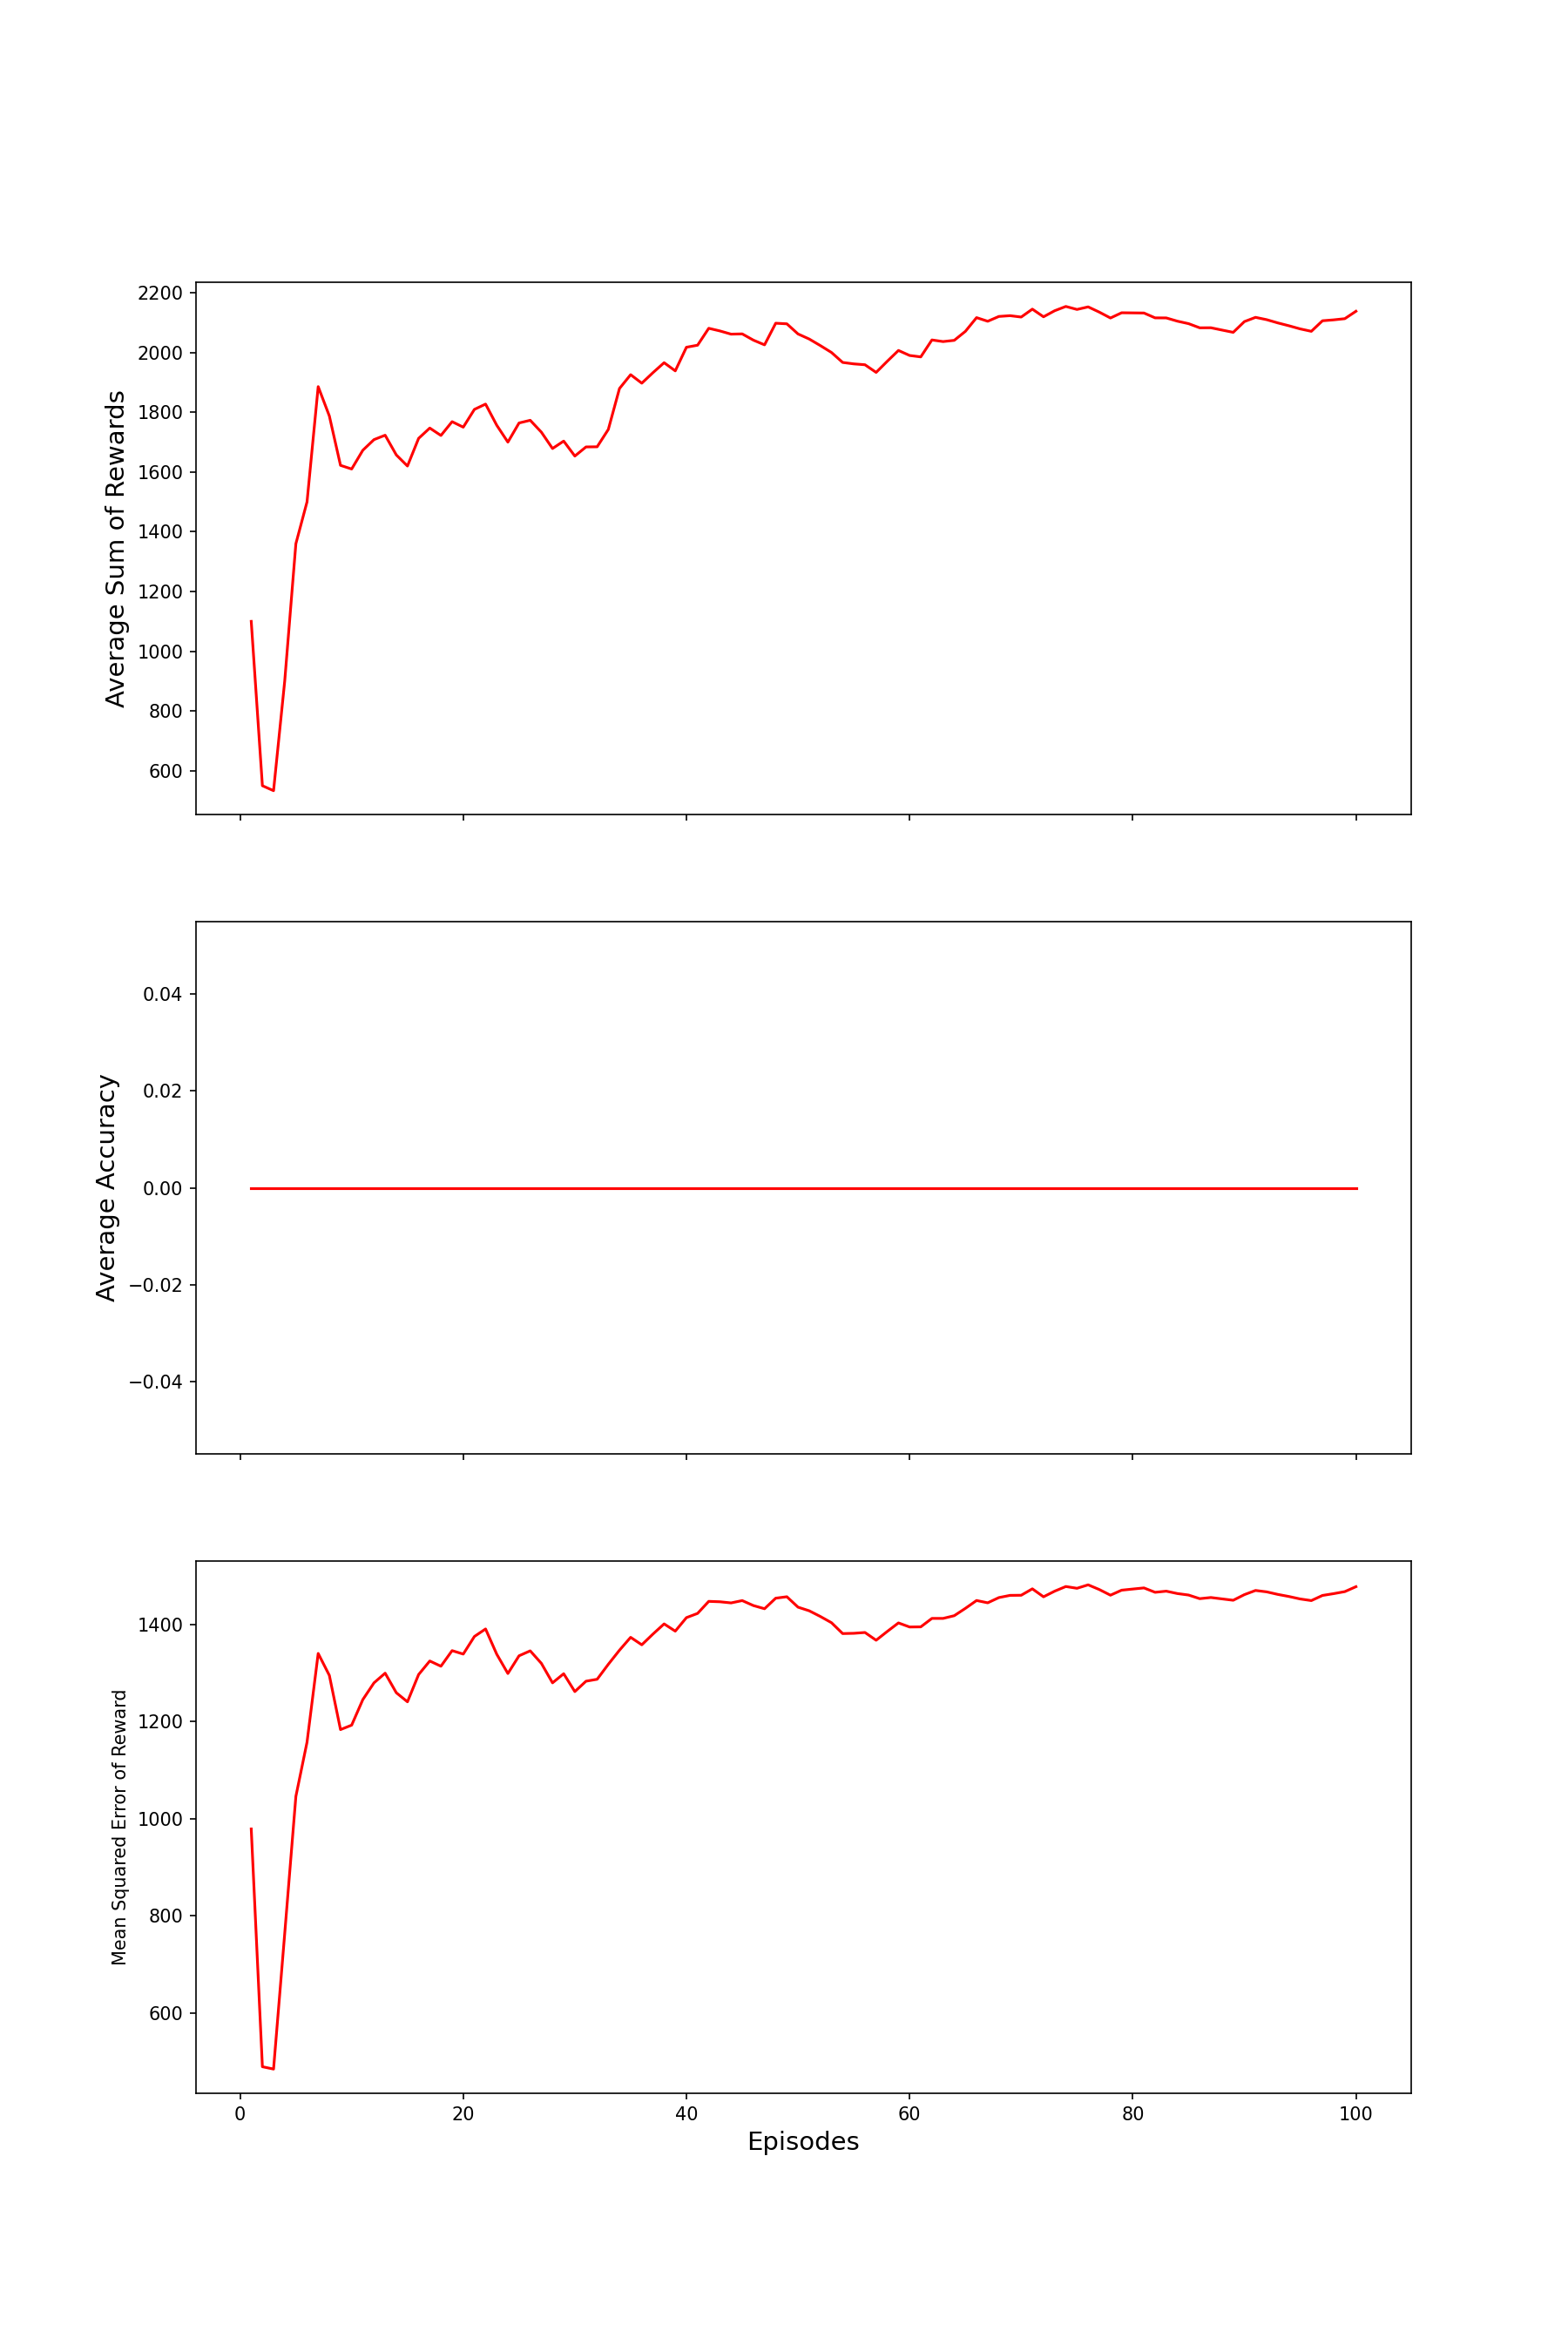

In [62]:
# Example graphs to make:
# Sum of rewards vs. Episodes
# % accuracy vs. Episodes
# RMSE vs. Episodes

episodes = np.arange(1, NUM_EPISODES+1, 1)

R_Sum_Ave = np.zeros((NUM_EPISODES))
accuracy = np.zeros((NUM_EPISODES))
MSE_Ave = np.zeros((NUM_EPISODES))

R_Sum_Ave[0] = R_SUM[0]
R_Sum_Ave[1:] = np.asarray([np.sum(R_SUM[:n])/(n+1) for n in range(1, NUM_EPISODES)])

accuracy[0] = hits[0]
accuracy[1:] = np.asarray([np.sum(hits[:n])/(n+1) for n in range(1, NUM_EPISODES)])

MSE_Ave[0] = MSE[0]
MSE_Ave[1:] = np.asarray([np.sum(MSE[:n])/(n+1) for n in range(1, NUM_EPISODES)])

# Make an example graph
fig, axes = plt.subplots(figsize = [12,18], nrows = 3, ncols = 1, sharex = True)
ax1 = axes[0]; ax2 = axes[1]; ax3 = axes[2]

ax1.plot(episodes, R_Sum_Ave, 'r-')
ax1.set_ylabel('Average Sum of Rewards', fontsize = 14)

ax2.plot(episodes, accuracy, 'r-')
ax2.set_ylabel('Average Accuracy', fontsize = 14)

ax3.plot(episodes, MSE_Ave, 'r-')
ax3.set_ylabel('Mean Squared Error of Reward')
ax3.set_xlabel('Episodes', fontsize = 14)

plt.show(block = False)

In [10]:
# # Write the data to a comma seperated text file for comparison with another algorithm.
# # Naming format:
# # Q-Learning_mo_nr.txt
# # mo refers to the number of obstacles used when the model learned
# #   (e.g., 0o is 0 obstacles, 1o is 1 obstacle, etc.)
# # nr will be filled with:
# #   nr: No Randomized (neither target nor agent were randomized per episode)
# #   tr: Target Randomized (only the target was randomized per episode)
# #   ar: Agent Randomized (only the agent was randomized per episode)
# #   br: Both Randomized (both the target and agent were randomized per episode)

# # Variables saved are:
# #   Episodes
# #   Hit/Miss for that episode
# #   Sum of Rewards for that episode (SR)
# #   Mean Square Error (Variance) for that episode (MSE)

# # Write the file
# f = open('Q-Learning_0o_tr.txt', 'w')

# # Write the headers
# f.write('Episode,Hit,SR,MSE' + '\n')

# # Write the data
# for n in range(NUM_EPISODES):
#     f.write(str(episodes[n]) + ',' + str(hits[n]) + ',' + str(R_SUM) + ',' + str(MSE) + '\n')
    
# # Close the file when finished
# f.close()

In [11]:
ANG_STATES

array([100, 103, 106, 109, 112, 115, 118, 121, 124, 127, 130, 133, 136,
       139, 142, 145, 148, 151, 154, 157, 160, 163, 166, 169, 172, 175,
       178, 181, 184, 187, 190, 193, 196, 199, 202, 205, 208, 211, 214,
       217, 220, 223, 226, 229, 232, 235, 238, 241, 244, 247, 250, 253,
       256, 259])

In [12]:
np.sum(V)

0.0